In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave
from playsound import playsound

In [2]:
#Previous functions

#Analysys equation
def DTFT(w,signal,n):
    y = []
    #Appending the summations for all omegas(w)
    for i in range(len(w)):

        #Summation for analysis equation for a particular omega(w[i])
        sum = 0
        for j in range(len(signal)):
              sum += signal[j]*complex(np.cos(w[i]*n[j]),-np.sin(w[i]*n[j]))
        y.append(sum)
    return y

def plot_spectrums(y,w):
    mag = []
    phase = []
    for i in range(len(w)):
        mag.append(abs(y[i]))
        phase.append(np.angle(y[i]))
    #Plotting the spectrums
    plt.title("Magnitude spectrum")
    plt.xlabel("ω")
    plt.ylabel("magnitude")
    plt.plot(w,mag)
    plt.show()
    plt.title("Phase spectrum")
    plt.xlabel("ω")
    plt.ylabel("phase(Radians)")
    plt.plot(w,phase)
    plt.show()
    
#Convolution function accepts input signal and impulse response as the parameters
def convolution(x,h):
    k = len(x)                                         #variable k stores length of input signal
    l = len(h)                                         #variable l stores length of impulse response
    p = k+l
    Y = np.zeros(p-1,dtype = complex)                    #length of output signal of convolution is k+l-1
    for i in range(0,p-1):                             #Filling in all the array values of output signal
        for j in range(0,k):                           #iteration over length of impulse response signal
            if i-j < l and i-j >= 0  :                 #impulse response is defined only for index greater than or equal to 0 and less than signal length
                Y[i]=Y[i]+x[j]*h[i-j]                  #Convolution sum
    return Y                                           #returns output signal i.e convolution of x and h

#Number of values of w
N = 100
#omega in the range -π ≤ ω < π
w = np.linspace(-np.pi,np.pi,N,endpoint = False)

def group_delay(ph_h):
    grd_h = []
    for i in range(N-1):
        grd = -(ph_h[i+1]-ph_h[i-1])/(2*(w[i+1]-w[i]))
        grd_h.append(round(grd,4))
    grd_h.append(grd)
    return grd_h

def delta(n):
    if n!=0:     #if n!=0 then it returns 0
        return 0  
    else:
        return 1 #else it returns 1
    
def u(n):
    if n>=0:     #if n>=0 then it returns 1
        return 1  
    else:
        return 0  #else it returns zero

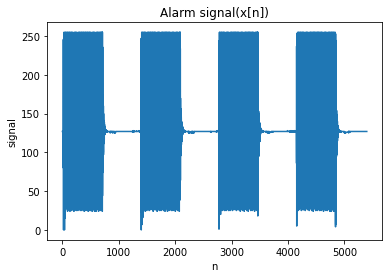

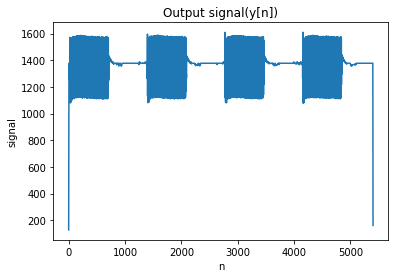

In [3]:
#Q1
#After calculating the h[n] manually we get the below signal
l = 5
h = np.zeros(l,dtype=complex)
h[0] = 1
h[1] = -1.25*np.exp(1j*-0.8*np.pi)-0.9*np.exp(1j*-0.6*np.pi)-0.9*np.exp(1j*0.6*np.pi)-1.25*np.exp(1j*0.8*np.pi)
h[2] = 1.125*np.exp(1j*-1.4*np.pi)+1.125*np.exp(1j*-0.2*np.pi)+2.3725+1.125*np.exp(1j*0.2*np.pi)+1.125*np.exp(1j*1.4*np.pi)
h[3] = -1.0125*np.exp(1j*-0.8*np.pi)-1.40625*np.exp(1j*-0.6*np.pi)-1.40625*np.exp(1j*0.6*np.pi)-1.0125*np.exp(1j*0.8*np.pi)
h[4] = 1.265625
alarm = wave.open("alarm.wav")  
signal = np.frombuffer(alarm.readframes(-1),dtype = np.uint8)
nf = len(signal)
plt.title("Alarm signal(x[n])")
plt.xlabel("n")
plt.ylabel("signal")
plt.plot(signal)
plt.show()

y = []
y = convolution(signal,h)
plt.title("Output signal(y[n])")
plt.xlabel("n")
plt.ylabel("signal")
plt.plot(np.real(y))
plt.show()

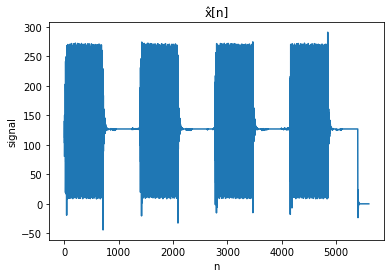

x[n] spectrums :-


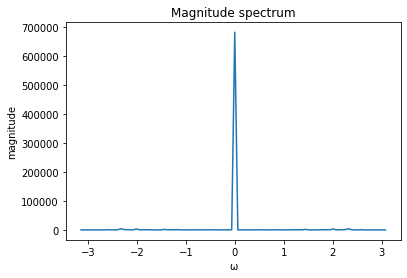

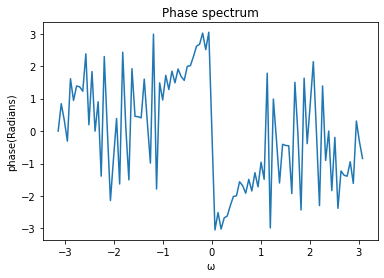

x̂[n] spectrums :-


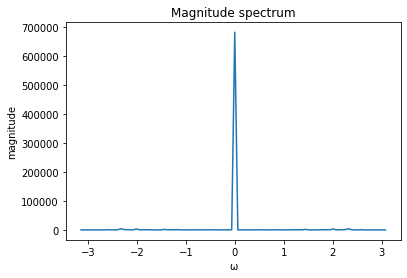

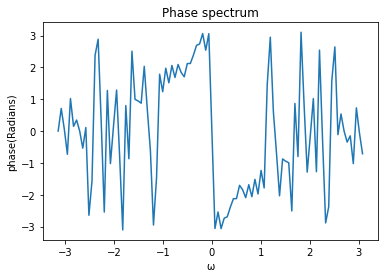

As we see above ,the spectrums of x[n] and x̂[n] are almost same.
The inverse system is pretty effective in undoing the effect of the distorting system h[n]


In [4]:
#Q2
#After calculating g[n] manually by applying partial fractions and inverse z transform we get the below signal

n = np.linspace(0,199,200)
g = np.zeros(200)
g = ((-0.14663288710561484+0.34062336288391076j)*((0.9*np.exp(1j*0.6*np.pi))**n)
     +(-0.1466328871056149-0.3406233628839108j)*((0.9*np.exp(-1j*0.6*np.pi))**n)
     +(0.46663288710561474+0.08383871435856204j)*((0.8*np.exp(1j*0.8*np.pi))**n)
     +(0.46663288710561474-0.08383871435856204j)*((0.8*np.exp(-1j*0.8*np.pi))**n))
x_cap = convolution(g,y)
plt.title("x̂[n]")
plt.xlabel("n")
plt.ylabel("signal")
plt.plot(np.real(x_cap))
plt.show()

n = []
n = np.linspace(0,nf-1,nf)
dtft = DTFT(w,signal,n)
print("x[n] spectrums :-")
plot_spectrums(dtft,w)

n = []
n = np.linspace(0,len(x_cap)-1,len(x_cap))
dtft = DTFT(w,x_cap,n)
print("x̂[n] spectrums :-")
plot_spectrums(dtft,w)
print("As we see above ,the spectrums of x[n] and x̂[n] are almost same.")
print("The inverse system is pretty effective in undoing the effect of the distorting system h[n]")

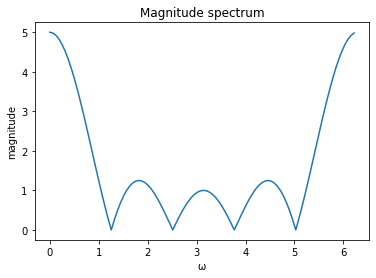

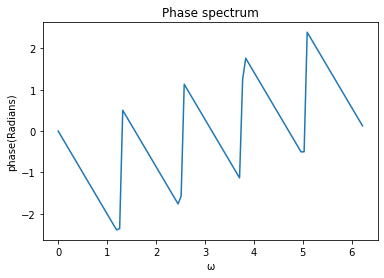

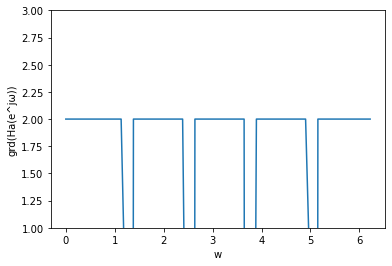

In [5]:
#Q3(a)
def h(n):
    inp = u(n) - u(n-5)
    return inp

k = 10  #For the range of the signal i.e signal lies between -k to k
m=[i for i in range(-k,k+1)]
#response signal
ha=[h(i) for i in m]

#Number of values of w
N = 100
#omega in the range 0 ≤ ω < 2π
w = np.linspace(0,2*np.pi,N,endpoint = False)

dtft_ha = DTFT(w,ha,m)
phase = []
for i in range(len(w)):
    phase.append(np.angle(dtft_ha[i]))

grd = group_delay(phase)
plot_spectrums(dtft_ha,w)

plt.xlabel("w")
plt.ylabel("grd(Ha(e^jω))")
plt.plot(w,grd) 
plt.ylim((1,3))
plt.show()

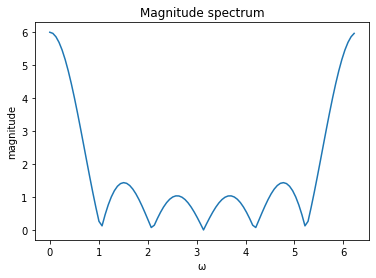

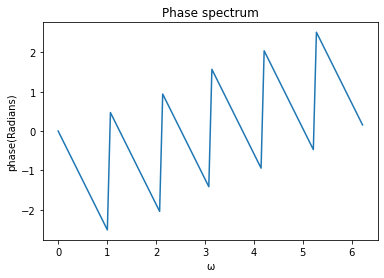

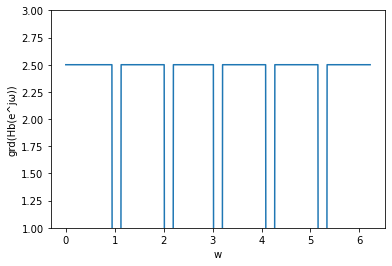

In [6]:
#Q3(b)
def h(n):
    inp = u(n) - u(n-6)
    return inp

k = 10  #For the range of the signal i.e signal lies between -k to k
m=[i for i in range(-k,k+1)]
#response signal
hb=[h(i) for i in m]

dtft_hb = DTFT(w,hb,m)
phase = []
for i in range(len(w)):
    phase.append(np.angle(dtft_hb[i]))

grd = group_delay(phase)
plot_spectrums(dtft_hb,w)

plt.xlabel("w")
plt.ylabel("grd(Hb(e^jω))")
plt.plot(w,grd)
plt.ylim((1,3))
plt.show()

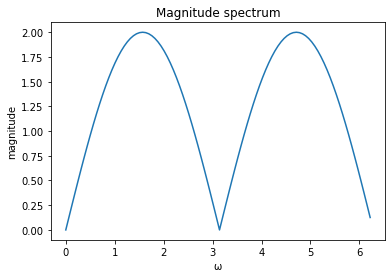

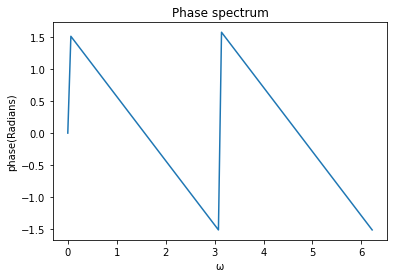

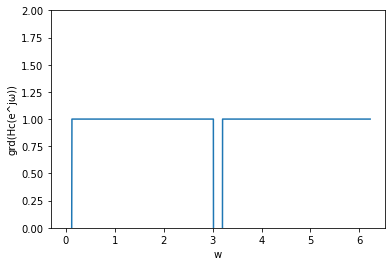

In [7]:
#Q3(c)
def h(n):
    inp = delta(n) - delta(n-2)
    return inp

k = 10  #For the range of the signal i.e signal lies between -k to k
m=[i for i in range(-k,k+1)]
#response signal
hc=[h(i) for i in m]

dtft_hc = DTFT(w,hc,m)
phase = []
for i in range(len(w)):
    phase.append(np.angle(dtft_hc[i]))

grd = group_delay(phase)
plot_spectrums(dtft_hc,w)

plt.xlabel("w")
plt.ylabel("grd(Hc(e^jω))")
plt.plot(w,grd) 
plt.ylim((0,2))
plt.show()

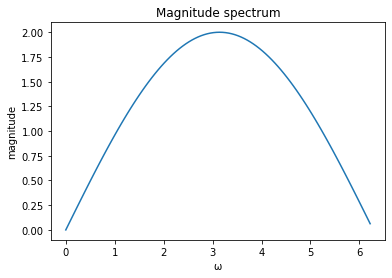

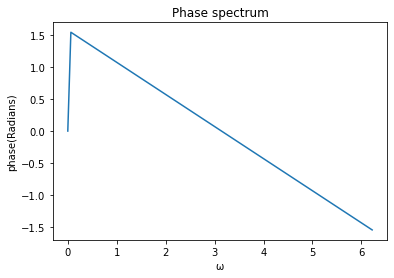

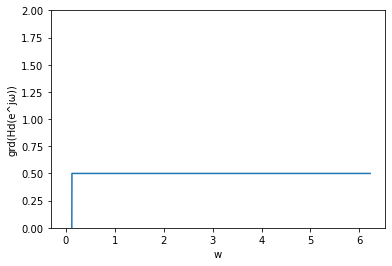

In [8]:
#Q3(d)
def h(n):
    inp = delta(n) - delta(n-1)
    return inp

k = 10  #For the range of the signal i.e signal lies between -k to k
m=[i for i in range(-k,k+1)]
#response signal
hd=[h(i) for i in m]

dtft_hd = DTFT(w,hd,m)
phase = []
for i in range(len(w)):
    phase.append(np.angle(dtft_hd[i]))

grd = group_delay(phase)
plot_spectrums(dtft_hd,w)

plt.xlabel("w")
plt.ylabel("grd(Hd(e^jω))")
plt.plot(w,grd)
plt.ylim((0,2))
plt.show()